# START SHERI'S NOTEBOOK

In [1]:
import pandas as pd
import numpy as np
import os
# import matplotlib.pyplot as plt
import warnings
import sklearn
# import seaborn as sns
warnings.simplefilter('ignore', DeprecationWarning)
warnings.simplefilter('ignore', FutureWarning)
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer
from sklearn import preprocessing
from sklearn import metrics as mt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn import tree
import pydotplus as plt
import six
from sklearn.tree import export_graphviz

In [2]:

path  =  "C:\\Users\\sheri\\Documents\\Data Science\\Data Mining\\Homework/Project 1\\DataMiningProject2-master\\" 
scada =  pd.read_csv(path + "SCADAcombined2017_T014.csv")
alarms_desc = pd.read_csv(path + "Siemens_Fault_Code_Descriptions.csv")
print("DF scada is: ", scada.shape)
scada.head()

DF scada is:  (52462, 1291)


,TimeStamp,StationId,wtc_VoltPhR_min,wtc_VoltPhR_max,wtc_VoltPhR_mean,wtc_VoltPhR_stddev,wtc_VoltPhS_min,wtc_VoltPhS_max,wtc_VoltPhS_mean,wtc_VoltPhS_stddev,...,wtc_TLC_SpeedRed_min,wtc_TLC_SpeedRed_max,wtc_TLC_SpeedRed_mean,wtc_TLC_SpeedRed_stddev,wtc_TLC_DeltaDay_min,wtc_TLC_DeltaDay_max,wtc_TLC_DeltaDay_mean,wtc_TLC_DeltaDay_stddev,wtc_OrStpDat_Status_endvalue,wtc_OrStpDat_LampStat_endvalue
0,2017-01-01 00:00:00.000,2308974,399.3,402.4,400.4424,0.333343,399.4,402.0,400.7586,0.287372,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Inactive,NotInst.
1,2017-01-01 00:10:00.000,2308974,398.2,401.2,399.2965,0.427948,397.8,401.0,399.6236,0.450038,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Inactive,NotInst.
2,2017-01-01 00:20:00.000,2308974,397.7,400.0,398.5997,0.283229,397.4,399.7,398.7689,0.277164,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Inactive,NotInst.
3,2017-01-01 00:30:00.000,2308974,397.8,400.4,398.7805,0.315703,397.7,400.1,399.0097,0.317276,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Inactive,NotInst.
4,2017-01-01 00:40:00.000,2308974,398.1,400.5,399.1493,0.326358,397.8,400.2,399.4183,0.313926,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Inactive,NotInst.


In [3]:
scada.dropna(thresh=10000,axis=1,inplace=True)

colsdrop = ['StationId', 'CommunicationId', 'NeighbourId',
           'NeighbourIdTwo', 'XPos', 'YPos', 'wtc_ActPower_min',
           'wtc_ActPower_max', 'wtc_ActPower_stddev',
           'wtc_AmpPhR_min', 'wtc_AmpPhR_max', 'wtc_AmpPhR_mean',
           'wtc_AmpPhR_stddev', 'wtc_AmpPhS_min', 'wtc_AmpPhS_max',
           'wtc_AmpPhS_mean', 'wtc_AmpPhS_stddev', 'wtc_AmpPhT_min',
           'wtc_AmpPhT_max', 'wtc_AmpPhT_mean', 'wtc_AmpPhT_stddev',
           'wtc_RawPower_min', 'wtc_RawPower_max', 'wtc_RawPower_mean',
           'wtc_RawPower_stddev', 'wtc_GenRpm_mean',
           'wtc_MainSRpm_mean', 'wtc_PitchRef_BladeA_mean',
           'wtc_PitchRef_BladeB_mean', 'wtc_PitchRef_BladeC_mean','wtc_TwrHumid_mean', 
            'wtc_PitcPosA_mean','wtc_PitcPosB_mean', 'wtc_PitcPosC_mean','wtc_BoostKWh_endvalue',
           'wtc_GeOilTmp_mean','wtc_HubTemp_mean','wtc_NacelTmp_mean','wtc_ConvWTmp_mean',
           'wtc_MainBTmp_mean','WindDir_Angle_3D_Avg','WindDir_Angle_3D_Std','WindDir_Angle_3D_Avg',
           'WindDir_Angle_3D_Std']

scada.drop(colsdrop,axis=1,inplace=True)

In [4]:

scada.dropna(inplace=True)
scada['wtc_AlarmCde_endvalue'] = scada['wtc_AlarmCde_endvalue'].astype(int)

df = scada.merge(alarms_desc, 
         left_on = 'wtc_AlarmCde_endvalue', 
         right_on="Code",
         how='left')

# del alarms_desc

df['TimeStamp'] = pd.to_datetime(df['TimeStamp'])
df.set_index('TimeStamp', inplace=True)
df.index

df.dropna(inplace=True)

print(df.shape)
df.describe().transpose()

(52751, 649)


,count,mean,std,min,25%,50%,75%,max
wtc_VoltPhR_min,52751.0,3.970191e+02,10.366360,2.000000e-01,3.945000e+02,3.967000e+02,3.996000e+02,4.253000e+02
wtc_VoltPhR_max,52751.0,4.001382e+02,8.698037,5.000000e-01,3.974000e+02,3.998000e+02,4.028000e+02,4.371000e+02
wtc_VoltPhR_mean,52751.0,3.981882e+02,8.849722,3.167467e-01,3.954531e+02,3.978480e+02,4.007914e+02,4.323134e+02
wtc_VoltPhR_stddev,52751.0,3.678904e-01,2.450194,6.156275e-02,2.721381e-01,3.036560e-01,3.501088e-01,2.042891e+02
wtc_VoltPhS_min,52751.0,3.967500e+02,10.350673,2.000000e-01,3.942000e+02,3.964000e+02,3.994000e+02,4.246000e+02
wtc_VoltPhS_max,52751.0,3.998094e+02,8.727320,5.000000e-01,3.971000e+02,3.995000e+02,4.025000e+02,4.361000e+02
wtc_VoltPhS_mean,52751.0,3.982932e+02,8.871922,3.025900e-01,3.955532e+02,3.979573e+02,4.009250e+02,4.318290e+02
wtc_VoltPhS_stddev,52751.0,3.444133e-01,2.448778,6.254655e-02,2.410050e-01,2.802810e-01,3.329168e-01,2.040560e+02
wtc_VoltPhT_min,52751.0,3.975466e+02,10.183507,1.000000e-01,3.956000e+02,3.974000e+02,3.997000e+02,4.258000e+02
wtc_VoltPhT_max,52751.0,4.001817e+02,8.478538,5.000000e-01,3.979000e+02,4.000000e+02,4.023000e+02,4.374000e+02


In [5]:
# Create new variables

# Rounded Wind Speed for GroupBy
df['WindSpeed_adj'] = df['wtc_AcWindSp_mean'].round(1)

# Wind changes at night
df['HourOfDay'] = df.index.hour

# Yaw Error
df['YawError'] = df['wtc_YawPos_mean'] - df['WindDir_ICEFREE_D1_WVT']

# Adding boost to ref set point
df['BoostedRef'] = df['wtc_BoostAva_mean'] + df['wtc_PowerRef_endvalue']

# Wind Sheer
df['WindSheer1'] = np.log(df['WS_Thies_80m_Avg'] / df['WS_Thies_26m_Avg']) / np.log(80/26)
# df['WindSheer2'] = np.log(df['WS_Thies_80m_Avg'] / df['WS_Thies_60m_Avg']) / np.log(80/60)

# Fault Types
df = df.rename(columns={'Fault Type': 'Fault_Type'})
df['Fault_Type'] = df['Fault_Type'].replace('W','0')
df['Fault_Type'] = df['Fault_Type'].astype(int)

# Boosted Power Delta
df['PowerDelta'] = df['BoostedRef'] - df['wtc_ActPower_mean']

available = (df['Fault_Type'] != 1) & (df['wtc_ScInOper_timeon'] == 600)
df['Available'] = [1 if x == True else 0 for x in available]

# Icing
icing = (df['AirTC_3m_Avg'] < 3) & (abs(df['WS_ICEFREE_Avg'] - df['WS_Thies_80m_Avg']) > 1)
df['Icing'] = [1 if x == True else 0 for x in icing]

# Air Density
df['Air_density'] = (df['BP_mbar_76m_Avg']*100)/((df['AirTC_3m_Avg']+273.15)*287.05)

# Air Density adjusted Wind Speed
df['AdjTurbineWS'] = df['wtc_AcWindSp_mean']*(np.power(df['Air_density'],(1/3)))

# Turbulence
df['TurbulenceMet'] = df['WS_Thies_80m_Std'] / df['WS_Thies_80m_Avg']
df['TurbulenceTurbine'] = df['wtc_AcWindSp_stddev'] / df['wtc_AcWindSp_mean']

# df['MainBearingFault'] = [1 if x == 64038 else 0 for x in df['Code']]

df.dropna(inplace=True)

C:\Users\sheri\venv\project1\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()


In [6]:
# Calculating Derate Conditions

#derate = (df['wtc_ActPower_mean'] == df['wtc_PowerRef_endvalue']) & (df['wtc_PowerRef_endvalue'] < 2300)
#derate = (df['wtc_PowerRef_endvalue'] < 2300)
derate = (df['PowerDelta'] < 0) & (df['Available'] == 1) & (df['BoostedRef'] < 2300) #df['BoostedRef'].max())
df['Derated'] = [1 if x == True else 0 for x in derate]

percent = (df['Derated'].sum() / len(df))*100
print('Percent of Derated Data:',percent,"%")

Percent of Derated Data: 9.900329693366112 %


In [78]:
# Use cleaned data set for calculating expected energy
clean = (df['Available'] == 1) & (df['wtc_PowerRef_endvalue'] == 2300) & (df['Icing'] == 0) & (df['wtc_BoostAva_mean'] == 0)
df_clean = df[clean]
pcurve95 = df_clean.groupby('WindSpeed_adj').quantile(q=0.95)
pcurve75 = df_clean.groupby('WindSpeed_adj').quantile(q=0.75)
pcurve50 = df_clean.groupby('WindSpeed_adj').median()
pcurve25 = df_clean.groupby('WindSpeed_adj').quantile(q=0.25)
pcurve5 = df_clean.groupby('WindSpeed_adj').quantile(q=0.05)

x0: 9.013482544002846
k: 0.6647066200991812
Cap: 2307.75965


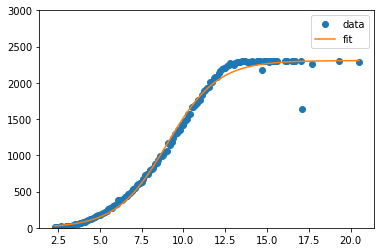

In [79]:
# Historical 5th Percentile

import pylab
from scipy.optimize import curve_fit
#from sklearn import preprocessing

def sigmoid(x, x0, k):
    #cap = 2300
    y = cap / (1 + np.exp(-k*(x-x0)))
    return y

xdata = pcurve5.index.values
ydata = pcurve5['wtc_ActPower_mean'].values
cap = np.max(pcurve5['wtc_ActPower_mean'].values)

popt, pcov = curve_fit(sigmoid, xdata, ydata)

pcurve5_x0 = popt[0]
pcurve5_k = popt[1]
pcurve5_cap = cap
print('x0:',pcurve5_x0)
print('k:',pcurve5_k)
print('Cap:',pcurve5_cap)

x = xdata
y = sigmoid(x,*popt)

pylab.plot(xdata, ydata, 'o', label='data')
pylab.plot(xdata,y, label='fit')
pylab.ylim(0, 3000)
pylab.legend(loc='best')
pylab.show()

In [9]:
def PowerCurve(wind, x0,k,cap):
    y = cap / (1 + np.exp(-k*(wind-x0)))
    return y

df['ExpectedEnergy_ref'] = df.apply(lambda x: PowerCurve(wind=x['wtc_AcWindSp_mean'], 
                                                          x0=7.70514731, 
                                                          k=0.85471648, 
                                                          cap=2300), 
                                     axis = 1)
df['ExpectedEnergy_5th'] = df.apply(lambda x: PowerCurve(wind=x['wtc_AcWindSp_mean'], 
                                                          x0=pcurve5_x0, 
                                                          k=pcurve5_k,
                                                          cap=pcurve5_cap), 
                                     axis = 1)

In [10]:

# Make labels# Make l 
# insipred by: https://stackoverflow.com/questions/26886653/pandas-create-new-column-based-on-values-from-other-columns

def make_class(row):
    if row["wtc_ActPower_mean"] <= row["ExpectedEnergy_5th"]:
        return "1"
    else:
        return "0"

df["Underperformance"] = df.apply(lambda x: make_class(x), axis=1)
df['Underperformance'] = df['Underperformance'].astype(int)

percent = (df['Underperformance'].sum() / len(df))*100
print('Percent of Under Performance Data:',percent,"%")

Percent of Under Performance Data: 26.82522440112058 %


## Random Forest Classifier and Regression target setup.

#### Below the classification scheme and the regression targets are defined.

### Classification
#### The classification is based on our definition of underperformance. Using the 26.8% of the data that shows underperformance, we have a boolean classification system. Then we setup the variables necessary to classify our data.

### Regression
#### The regression target is based on the actual power output of the turbine, "wtc_ActPower_mean". We define a separate set of variables we wish to use to predict the power output.

In [11]:
#Encode the labels (examples found on SKLearn website... need to find address)
le = preprocessing.LabelEncoder()
le.fit(list(df["Underperformance"].unique()))

df["target"] = le.transform(df["Underperformance"])
df = df.replace([np.inf, -np.inf], np.nan).dropna()



#Now the other variables used to train the model need to scaled. 
#First, however, un-need variables need to be dropped.
#classifier target is based on our determination of when the turbine is underperforming
cl_target = df['target']


classcols = ['BoostedRef', 'WindSheer1',
            'wtc_AcWindSp_mean','wtc_NacelPos_mean','wtc_ScInOper_timeon', 
            'WS_Thies_80m_Avg', 'WS_Thies_60m_Avg', 'WS_ICEFREE_Avg',
           'BP_mbar_76m_Avg', 'AirTC_3m_Avg','Icing','Air_density','target']

cl_data = df[classcols]

#regression target is based on the actual power output from the turbine
y = df["wtc_ActPower_mean"]

keepcols = ['BoostedRef', 'WindSheer1',
            'wtc_AcWindSp_mean','wtc_NacelPos_mean','wtc_ScInOper_timeon', 
            'WS_Thies_80m_Avg', 'WS_Thies_60m_Avg', 'WS_ICEFREE_Avg',
           'BP_mbar_76m_Avg', 'AirTC_3m_Avg','Icing','Air_density']

data = df[keepcols]


X = preprocessing.scale(data) 

data.columns

Index(['BoostedRef', 'WindSheer1', 'wtc_AcWindSp_mean', 'wtc_NacelPos_mean',
       'wtc_ScInOper_timeon', 'WS_Thies_80m_Avg', 'WS_Thies_60m_Avg',
       'WS_ICEFREE_Avg', 'BP_mbar_76m_Avg', 'AirTC_3m_Avg', 'Icing',
       'Air_density'],
      dtype='object')

## Classification

In [17]:
#Code from https://towardsdatascience.com/random-forest-in-python-24d0893d51c0
# Our data set is divided into a test and training set, randomly
df['is_train'] = np.random.uniform(0, 1, len(df)) <= .75

# Create two new dataframes, one with the training rows, one with the test rows
train, test = df[df['is_train']==True], df[df['is_train']==False]

# Show the number of observations for the test and training dataframes
print('Number of observations in the training data:', len(train))
print('Number of observations in the test data:',len(test))

Number of observations in the training data: 39233
Number of observations in the test data: 13231


In [18]:
# Create a list of the feature column's names
feat = df[keepcols]

features = feat.columns
# View features
features

#create target
target = train['target']

In [19]:
#code from https://chrisalbon.com/machine_learning/trees_and_forests/random_forest_classifier_example/
#load random forest classifier
from sklearn.ensemble import RandomForestClassifier

#set random seed
np.random.seed(0)

##### Classification parameter change 1

In [20]:
#train the random forest classifier
#Try different parameters and compare

#Parameter try 1
clf = RandomForestClassifier(n_jobs=2, random_state=0, max_depth=10)

clf.fit(train[features], target)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [22]:
# Code from: http://scikit-learn.org/stable/modules/cross_validation.html 
# & https://stackoverflow.com/questions/31221060/how-do-i-cross-validate-my-predictions-from-random-forest-in-python-sklearn?rq=1
from sklearn import svm
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, train[features], target, cv = 10, scoring='precision')
scores

array([0.94859038, 0.94668246, 0.90514286, 0.87135135, 0.9286475 ,
       0.94987147, 0.9558011 , 0.97668712, 0.951417  , 0.92564103])

#### After splitting the data and performing the random forest classifier, I used 10 fold cross validation to get several scores with a different split each time. There is a fairly large range of scores: 87% - 97.7%.

In [17]:
#Apply the classifier to the test data set
y_pred = clf.predict(test[features])

In [18]:
# View the predicted probabilities of the first 10 observations
clf.predict_proba(test[features])[0:10]

array([[9.53056077e-01, 4.69439231e-02],
       [9.50609532e-01, 4.93904679e-02],
       [7.51879699e-04, 9.99248120e-01],
       [5.57268555e-01, 4.42731445e-01],
       [1.42857143e-02, 9.85714286e-01],
       [7.40740741e-03, 9.92592593e-01],
       [7.40740741e-03, 9.92592593e-01],
       [2.20238095e-02, 9.77976190e-01],
       [1.00000000e-01, 9.00000000e-01],
       [9.45840056e-01, 5.41599436e-02]])

In [19]:
preds = clf.predict(test[features])
preds[0:10]

array([0, 0, 1, 0, 1, 1, 1, 1, 1, 0], dtype=int64)

In [20]:
# Create confusion matrix
pd.crosstab(test['target'], preds, rownames=['Actual Target'], colnames=['Predicted Target'])

Predicted Target,0,1
Actual Target,,
0,9394,150
1,835,2607


In [21]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(test['target'], y_pred))

Accuracy: 0.924149083628523


#### The above table shows how our power classifications match up with the actual power recorded. I have chosen accuracy of prediction for the preferred evaluation metric. This is because the desired outcome for this analysis is to be able to predict and determine the causes of turbine underperformance. Therefore, accuracy of prediction and subsequent identification of the most influential variables is sufficient to meet our needs.

In [22]:
# View a list of the features and their importance scores
list(zip(train[features], clf.feature_importances_))

[('BoostedRef', 0.1795082249640288),
 ('WindSheer1', 0.02724244386276123),
 ('wtc_AcWindSp_mean', 0.19789266272637504),
 ('wtc_NacelPos_mean', 0.022670513513907677),
 ('wtc_ScInOper_timeon', 0.3300225292224838),
 ('WS_Thies_80m_Avg', 0.06255021310062796),
 ('WS_Thies_60m_Avg', 0.034919376060506546),
 ('WS_ICEFREE_Avg', 0.07814811173153885),
 ('BP_mbar_76m_Avg', 0.03207302015997526),
 ('AirTC_3m_Avg', 0.016667025164493324),
 ('Icing', 0.0001760298870475491),
 ('Air_density', 0.01812984960625389)]

#### For parameter option #1
##### The most influential variables that helped predict underperformance were:
##### wtc_ScInOper_timeon at 31%, 
##### wtc_AcWindSp_mean at 26%, 
##### BoostedRef at 16%, 
##### and WS_ICEFREE_Avg at 8%.

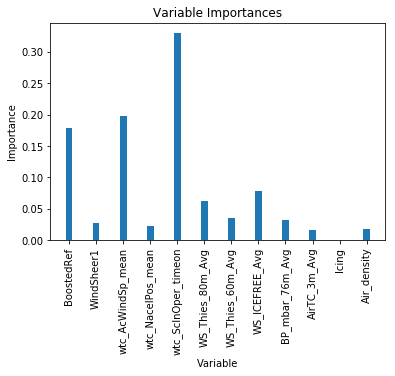

In [23]:
#http://dataaspirant.com/2017/04/21/visualize-decision-tree-python-graphviz/
# reminder
# X = data
# y = df.target

pylab.bar (keepcols, clf.feature_importances_, 1/4)
pylab.xticks(keepcols, rotation='vertical')
pylab.ylabel('Importance'); pylab.xlabel('Variable'); pylab.title('Variable Importances');
pylab.show()

# import altair as alt
# from vega_datasets import data
# alt.renderers.enable('notebook')

# alt.Chart(clf.feature_importances_).mark_bar().encode(
#     y='Percentage Explained',
#     x='train[features]')


##### Classification parameter change 2

In [23]:
clf = RandomForestClassifier(n_jobs=2, random_state=5, max_depth=10, max_leaf_nodes=5)

clf.fit(train[features], target)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=5,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
            oob_score=False, random_state=5, verbose=0, warm_start=False)

In [24]:
# Code from: http://scikit-learn.org/stable/modules/cross_validation.html 
# & https://stackoverflow.com/questions/31221060/how-do-i-cross-validate-my-predictions-from-random-forest-in-python-sklearn?rq=1
from sklearn import svm
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, train[features], target, cv = 10, scoring='precision')
scores

array([0.96613995, 0.99404762, 0.9484127 , 0.89779006, 0.98734177,
       0.94436906, 0.95520231, 0.98005319, 0.99304348, 0.98391421])

#### After splitting the data and performing the random forest classifier with our second set of parameters, I again used 10 fold cross validation to get several scores with a different split each time. There is still a fairly large range of scores: 90% - 99%, but this set of parameters is much more accurate than the previous option. 

In [25]:
#Apply the classifier to the test data set
clf.predict(test[features])

array([0, 0, 1, ..., 1, 1, 1], dtype=int64)

In [26]:
# View the predicted probabilities of the first 10 observations
clf.predict_proba(test[features])[0:10]

array([[0.86039892, 0.13960108],
       [0.85951996, 0.14048004],
       [0.12207396, 0.87792604],
       [0.85230027, 0.14769973],
       [0.12207396, 0.87792604],
       [0.12207396, 0.87792604],
       [0.12207396, 0.87792604],
       [0.50785854, 0.49214146],
       [0.03569749, 0.96430251],
       [0.81849275, 0.18150725]])

In [27]:
preds = clf.predict(test[features])
preds[0:10]

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 0], dtype=int64)

In [28]:
# Create confusion matrix
pd.crosstab(test['target'], preds, rownames=['Actual Target'], colnames=['Predicted Target'])

Predicted Target,0,1
Actual Target,,
0,9488,56
1,1733,1709


In [29]:
#Apply the classifier to the test data set
y_pred = clf.predict(test[features])

In [30]:
print("Accuracy:",metrics.accuracy_score(test['target'], y_pred))

Accuracy: 0.8622362544278454


In [31]:
# View a list of the features and their importance scores
list(zip(train[features], clf.feature_importances_))

[('BoostedRef', 0.05227185018925775),
 ('WindSheer1', 0.014950046154264419),
 ('wtc_AcWindSp_mean', 0.2889733875619839),
 ('wtc_NacelPos_mean', 0.006175989356641929),
 ('wtc_ScInOper_timeon', 0.46651256637401095),
 ('WS_Thies_80m_Avg', 0.055596487923721606),
 ('WS_Thies_60m_Avg', 0.045336804740876216),
 ('WS_ICEFREE_Avg', 0.05494999954859928),
 ('BP_mbar_76m_Avg', 0.015232868150643907),
 ('AirTC_3m_Avg', 0.0),
 ('Icing', 0.0),
 ('Air_density', 0.0)]

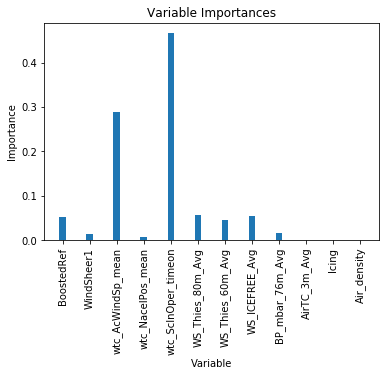

In [32]:
pylab.bar (keepcols, clf.feature_importances_, 1/4)
pylab.xticks(keepcols, rotation='vertical')
pylab.ylabel('Importance'); pylab.xlabel('Variable'); pylab.title('Variable Importances');
pylab.show()

#### The above table shows how our power classifications match up with the actual power recorded. 

#### For parameter option #2
##### The most influential features that helped predict underperformance were: 
##### wtc_ScInOper_timeon at 44%, 
##### wtc_AcWindSp_mean at 27%, 
##### WS_ICEFREE_Avg at 9%, 
##### and WS_Thies_60m_Avg at 7%.

#### Parameter change #3

In [25]:
clf = RandomForestClassifier(n_jobs=2, random_state=10, max_depth=15, max_leaf_nodes=10)

clf.fit(train[features], target)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features='auto', max_leaf_nodes=10,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=2,
            oob_score=False, random_state=10, verbose=0, warm_start=False)

In [26]:
# Code from: http://scikit-learn.org/stable/modules/cross_validation.html 
# & https://stackoverflow.com/questions/31221060/how-do-i-cross-validate-my-predictions-from-random-forest-in-python-sklearn?rq=1
from sklearn import svm
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, train[features], target, cv = 10, scoring='precision')
scores

array([0.95491803, 0.96046512, 0.91501976, 0.88030303, 0.91601344,
       0.93409379, 0.95163585, 0.97820163, 0.98477157, 0.97905759])

#### After splitting the data and performing the random forest classifier with our third set of parameters, I once again used 10 fold cross validation to get several scores with a different split each time. The range of scores is similar to the first two attempts: 88% - 98%, and this set of parameters is less accurate than the second option. Clearly, allowing a higher number of leaf nodes or more branches (depth) does not help the accuracy of the model.

In [34]:
#Apply the classifier to the test data set
clf.predict(test[features])

array([0, 0, 1, ..., 1, 1, 1], dtype=int64)

In [35]:
# View the predicted probabilities of the first 10 observations
clf.predict_proba(test[features])[0:10]

array([[0.89374706, 0.10625294],
       [0.89002595, 0.10997405],
       [0.07520833, 0.92479167],
       [0.75288481, 0.24711519],
       [0.09708357, 0.90291643],
       [0.16462369, 0.83537631],
       [0.16462369, 0.83537631],
       [0.48487897, 0.51512103],
       [0.06413647, 0.93586353],
       [0.80987986, 0.19012014]])

In [36]:
preds = clf.predict(test[features])
preds[0:10]

array([0, 0, 1, 0, 1, 1, 1, 1, 1, 0], dtype=int64)

In [37]:
# Create confusion matrix
pd.crosstab(test['target'], preds, rownames=['Actual Target'], colnames=['Predicted Target'])

Predicted Target,0,1
Actual Target,,
0,9436,108
1,1440,2002


In [38]:
#Apply the classifier to the test data set
y_pred = clf.predict(test[features])

print("Accuracy:",metrics.accuracy_score(test['target'], y_pred))

Accuracy: 0.8807947019867549


In [39]:
# View a list of the features and their importance scores
list(zip(train[features], clf.feature_importances_))

[('BoostedRef', 0.10194104246543663),
 ('WindSheer1', 0.007622251175905074),
 ('wtc_AcWindSp_mean', 0.257198989884963),
 ('wtc_NacelPos_mean', 0.006859213417685526),
 ('wtc_ScInOper_timeon', 0.3911308470165349),
 ('WS_Thies_80m_Avg', 0.040549880972477484),
 ('WS_Thies_60m_Avg', 0.060305364531435056),
 ('WS_ICEFREE_Avg', 0.08294623735054334),
 ('BP_mbar_76m_Avg', 0.044274488849141945),
 ('AirTC_3m_Avg', 0.004328047490695426),
 ('Icing', 0.0),
 ('Air_density', 0.0028436368451816582)]

#### The above table shows how our power classifications match up with the actual power recorded.

#### For parameter option #3
##### The most influential features that helped predict underperformance were: 
##### wtc_ScInOper_timeon at 40%, 
##### wtc_AcWindSp_mean at 25%, 
##### BoostedRef at 11%, 
##### and WS_Thies_80m_Avg at 7%.

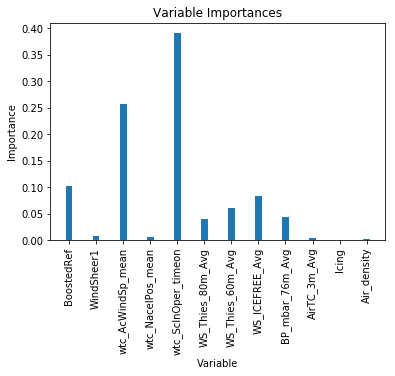

In [40]:
# alt.Chart(clf.feature_importances_).mark_bar().encode(
#     y='Percentage Explained',
#     x='train[features]')
pylab.bar (keepcols, clf.feature_importances_, 1/4)
pylab.xticks(keepcols, rotation='vertical')
pylab.ylabel('Importance'); pylab.xlabel('Variable'); pylab.title('Variable Importances');
pylab.show()

### With each parameter change, the accuracy changed significantly. 

#### With Parameter set 1: the random_state is 0 and the max_depth is 10. This produced an accuracy range of 87% - 97.7% using cross-fold validation.
#### With Parameter set 2: the random_state is 5, max_depth is 10, and max_nodes is 5. This produced an accuracy range of 90% - 99% using cross-fold validation.
#### With Parameter set 3: the random_state is 10, max_depth is 15, and max_nodes is 10. This produced an accuracy range of 88% - 98% using cross-fold validation.

### In addition to accuracy changes, the important features changed and their percentage of influence changed significantly. 


## Regression

In [27]:
#Code from https://towardsdatascience.com/random-forest-in-python-24d0893d51c0
y_a = np.array(y, dtype=pd.Series)
print(y_a)

train_y_a, test_y_a, train_data, test_data = train_test_split(y_a, data, test_size = 0.25, random_state = 42)
train_y_r = np.atleast_2d(train_y_a)
test_y_r = np.atleast_2d(test_y_a)
print(train_y_r)
print(test_y_r)
train_y_s = train_y_r.reshape(-1,1)
print(train_y_s)
test_y_s = test_y_r.reshape(-1,1)
print(test_y_s)

[1554.1629999999998 1027.646 689.9637 ... -27.846870000000003 -27.76335
 -27.61562]
[[1586.6570000000002 236.7694 1769.4520000000002 ... 1097.237 551.3526
  932.595]]
[[2138.28 309.7698 2302.3179999999998 ... 433.6547 1971.317 319.1144]]
[[1586.6570000000002]
 [236.7694]
 [1769.4520000000002]
 ...
 [1097.237]
 [551.3526]
 [932.595]]
[[2138.28]
 [309.7698]
 [2302.3179999999998]
 ...
 [433.6547]
 [1971.317]
 [319.1144]]


In [28]:
print('Training Features Shape:', train_y_s.shape)
print('Training Labels Shape:', train_data.shape)
print('Testing Features Shape:', test_y_s.shape)
print('Testing Labels Shape:', test_data.shape)

Training Features Shape: (39348, 1)
Training Labels Shape: (39348, 12)
Testing Features Shape: (13116, 1)
Testing Labels Shape: (13116, 12)


### Regression parameters setting 1

In [61]:
# Using the parameters identified in the classification step as most accurate
from sklearn.ensemble import RandomForestRegressor

# Instantiate model with 10 decision tree
rf_1 = RandomForestRegressor(n_estimators = 10, random_state = 5, max_depth = 10, max_leaf_nodes = 5)


In [62]:
# Train the model on training data
# rf.fit(train_y_s, train_data);
rf_1.fit(train_data, train_y_a);

In [63]:
# Use the forest's predict method on the test data
predictions_1 = rf_1.predict(test_data)

# Calculate the absolute errors
errors = abs(predictions_1 - test_y_a)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'kWh.')

Mean Absolute Error: 177.47 kWh.


In [64]:
score_1 = rf_1.score(test_data, test_y_a)
print(score_1)

# http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

0.8856391028597367


##### The results from the first choice in parameters (n_estimators=10 and the rest default) had an accuracy of 88.5%. With n_estimators set at 10 the regression will use a max of 10 trees. More trees increases accuracy but slows the code down. The max depth was set at 10 and the max leaf nodes set at 5.

### Regression parameters setting 2

In [65]:
# Instantiate model with 50 decision trees
rf_2 = RandomForestRegressor(n_estimators = 10, random_state = 5)

In [66]:
# Train the model on training data
# rf.fit(train_y_s, train_data);
rf_2.fit(train_data, train_y_a);

In [67]:
# Use the forest's predict method on the test data
predictions_2 = rf_2.predict(test_data)

# Calculate the absolute errors
errors = abs(predictions_2 - test_y_a)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'kWh.')

Mean Absolute Error: 58.38 kWh.


In [68]:
score_2 = rf_2.score(test_data, test_y_a)
print(score_2)

0.9833006225264849


##### The results from the second choice in parameters (n_estimators=10 and the rest default) had a slightly higher accuracy of 98.3%. With n_estimators set at 10 the regression will use 10 trees. More trees increases accuracy but slows the code down.

### Regression parameters setting 3

In [69]:
# Instantiate model with 50 decision trees and with oob_score set to True
rf_3 = RandomForestRegressor(n_estimators = 50, max_features = .2, oob_score=True, random_state = 5)

In [70]:
# Train the model on training data
# rf.fit(train_y_s, train_data);
rf_3.fit(train_data, train_y_a);

In [71]:
# Use the forest's predict method on the test data
predictions_3 = rf_3.predict(test_data)

# Calculate the absolute errors
errors = abs(predictions_3 - test_y_a)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'kWh.')

Mean Absolute Error: 69.72 kWh.


In [72]:
score_3 = rf_3.score(test_data, test_y_a)
print(score_3)

0.9806034388577177


##### The results from the third choice in parameters (n_estimators=50, max_features=20%, and oob_score set to true) had a slightly lower accuracy of 98.1%. With n_estimators set at 50 the regression will use 50 trees. More trees increases accuracy but slows the code down. Max_features limits the number of feartures that are allowed to try in each tree. Setting the oob_score at true tags each observation that is in different trees. Then for every tree that doesn't use a particular observation, it finds the maximum score.

## Final model choice

#### Using the parameters of the second model (which had the highest (98.3%) accuracy, we create the final random forest model choice.

In [76]:
# Rerunning the second parameters for all future efforts

# Instantiate model with 50 decision trees
rf = RandomForestRegressor(n_estimators = 10, random_state = 5)

# Train the model on training data
rf.fit(train_data, train_y_a);

# Use the forest's predict method on the test data
predictions = rf.predict(test_data)

# Calculate the absolute errors
errors = abs(predictions - test_y_a)

print(predictions_1)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'kWh.')

[2013.43894443  150.23189868 2013.43894443 ...  516.37932975 2013.43894443
  150.23189868]
Mean Absolute Error: 58.38 kWh.


In [43]:
score = rf.score(test_data, test_y_a)
print(score)

0.9833006225264849


In [44]:
# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(keepcols, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)


# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: wtc_AcWindSp_mean    Importance: 0.87
Variable: BoostedRef           Importance: 0.07
Variable: wtc_ScInOper_timeon  Importance: 0.05
Variable: WindSheer1           Importance: 0.0
Variable: wtc_NacelPos_mean    Importance: 0.0
Variable: WS_Thies_80m_Avg     Importance: 0.0
Variable: WS_Thies_60m_Avg     Importance: 0.0
Variable: WS_ICEFREE_Avg       Importance: 0.0
Variable: BP_mbar_76m_Avg      Importance: 0.0
Variable: AirTC_3m_Avg         Importance: 0.0
Variable: Icing                Importance: 0.0
Variable: Air_density          Importance: 0.0


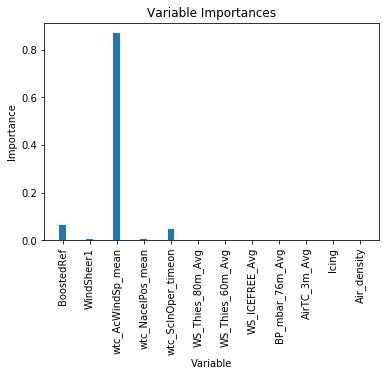

In [45]:
pylab.bar (keepcols, rf.feature_importances_, 1/4)

pylab.xticks(keepcols, rotation='vertical')
pylab.ylabel('Importance'); pylab.xlabel('Variable'); pylab.title('Variable Importances');
pylab.show()

#### With our final random forest model, we get 98.3% accuracy that primarily depends on the mean wind speed (87%). This result makes sense as the power output of the turbine would seem to primarily depend on the wind speed.

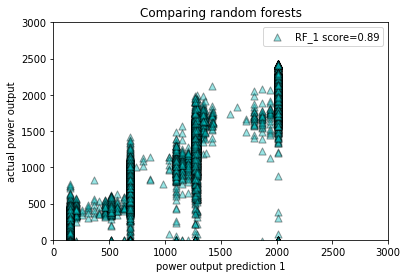

In [85]:
# REMINDERS
# y_a = np.array(y, dtype=pd.Series)
# print(y_a)

# train_y_a, test_y_a, train_data, test_data = train_test_split(y_a, data, test_size = 0.25, 
#     random_state = 42)
# train_y_r = np.atleast_2d(train_y_a)
# test_y_r = np.atleast_2d(test_y_a)
# print(train_y_r)
# print(test_y_r)
# train_y_s = train_y_r.reshape(-1,1)
# print(train_y_s)
# test_y_s = test_y_r.reshape(-1,1)
# print(test_y_s)

# # Instantiate model with 50 decision trees
# rf = RandomForestRegressor(n_estimators = 10, random_state = 5)

# # Train the model on training data
# rf.fit(train_data, train_y_a);

# # Use the forest's predict method on the test data
# predictions = rf.predict(test_data)

# # Calculate the absolute errors
# errors = abs(predictions - test_y_a)
# score = rf.score(test_data, test_y_a)

# Plot the results
pylab.figure()
s = 50
a = 0.4

pylab.scatter(predictions_1, test_y_a, edgecolor='k', c="c", s=s, marker="^", alpha=a,
            label="RF_1 score=%.2f" % rf_1.score(test_data, test_y_a))
pylab.xlim([0, 3000])
pylab.ylim([0, 3000])
pylab.xlabel("power output prediction 1")
pylab.ylabel("actual power output")
pylab.title("Comparing random forests")
pylab.legend()
pylab.show()

#### From this plot it is clear that the predictive accuracy of the first random forest model is not very accurate.

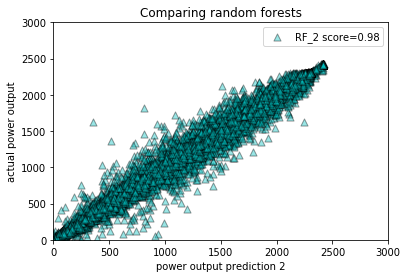

In [84]:
# Plot the results
pylab.figure()
s = 50
a = 0.4

pylab.scatter(predictions_2, test_y_a, edgecolor='k', c="c", s=s, marker="^", alpha=a,
            label="RF_2 score=%.2f" % rf_2.score(test_data, test_y_a))
pylab.xlim([0, 3000])
pylab.ylim([0, 3000])
pylab.xlabel("power output prediction 2")
pylab.ylabel("actual power output")
pylab.title("Comparing random forests")
pylab.legend()
pylab.show()

#### The predictive accuracy of the second random forest model is very high.

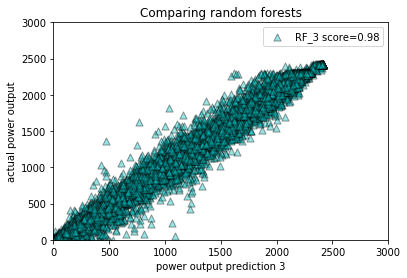

In [83]:
# Plot the results
pylab.figure()
s = 50
a = 0.4

pylab.scatter(predictions_3, test_y_a, edgecolor='k', c="c", s=s, marker="^", alpha=a,
            label="RF_3 score=%.2f" % rf_3.score(test_data, test_y_a))
pylab.xlim([0, 3000])
pylab.ylim([0, 3000])
pylab.xlabel("power output prediction 3")
pylab.ylabel("actual power output")
pylab.title("Comparing random forests")
pylab.legend()
pylab.show()

#### The third random forest model is very similar to the second model which is what we saw earlier. 

# END SHERI'S NOTEBOOK